[View in Colaboratory](https://colab.research.google.com/github/LLerchenfeld/Robotics_Cognition_Intelligence/blob/master/LeNet_Keras.ipynb)

In [0]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import optimizers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Model, load_model
from keras.utils import to_categorical
#import pydot # disabled for CoLab
#from keras.utils import plot_model # disabled for CoLab

In [41]:
# Load datasets
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [42]:
# Reshape data
def encode(data):
    # One hot encoding
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded
def decode(datum):
    return np.argmax(datum)

train_data = np.append(train_data,eval_data[0:5000,:])
eval_data = eval_data[5000:,:]
train_data = train_data.reshape([60000, 28, 28,1])
eval_data = eval_data.reshape([5000,28,28,1]) # Test set
train_labels = np.append(train_labels,eval_labels[0:5000])
eval_labels = eval_labels[5000:]
print('train_data.shape = ',train_data.shape)
train_labels = encode(train_labels)
eval_labels = encode(eval_labels)

train_data.shape =  (60000, 28, 28, 1)
Shape of data (BEFORE encode): (60000,)
Shape of data (AFTER  encode): (60000, 10)

Shape of data (BEFORE encode): (5000,)
Shape of data (AFTER  encode): (5000, 10)



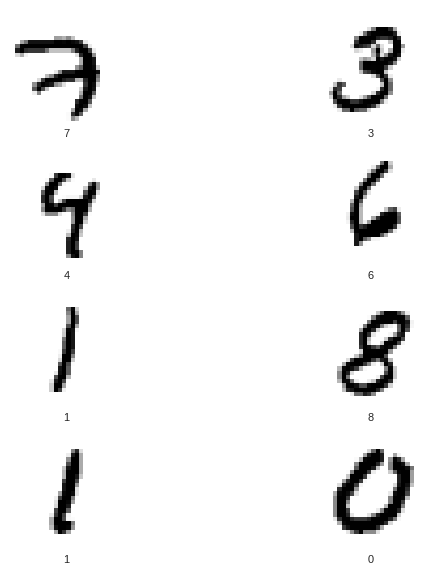

In [43]:
# Show data
img = {}
plt.figure(figsize=(10,10))
for i in range(8):
    img[i] = train_data[i,:,:,0]   
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(img[i], cmap=plt.cm.binary, aspect='equal')
    plt.xlabel(decode(train_labels[i]))    

In [44]:
# Define Model    
def LeNet(input_shape = (28,28,1), classes=10):
    """
    Implementation of advanced LeNet (using ReLUs and MaxPool)
    Conv -> Pool -> Conv -> Pool -> Conv -> FC 
    """
    
    X_input = Input(input_shape)
    
    # Stage 1
    X = Conv2D(6, 5, strides=(1, 1), padding='valid',kernel_initializer='glorot_uniform')(X_input)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides=(2, 2))(X)
    X = Dropout(0.5)(X)
    
    # Stage 2
    X = Conv2D(filters=16, kernel_size=5, strides=(1, 1), padding='valid',kernel_initializer='glorot_uniform')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides=(2, 2))(X)
    #X = Dropout(0.5)(X)
    
    # Stage 3
    X = Conv2D(filters=5, kernel_size=1, strides=(1,1),kernel_initializer='glorot_uniform')(X)
    X = Flatten()(X)
    X = Dense(84)(X)
    X = Dropout(0.5)(X)
    X = Dense(10,activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name='LeNet')
    
    return model

model = LeNet(input_shape=(28,28,1),classes=10)
model.summary()
# plot_model(model, to_file='HappyModel.png') # disabled for CoLab

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 6)         24        
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 6)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 16)          2416      
__________

In [0]:
# Define Hyperparameters
alpha = np.zeros([5])
beta = np.zeros([5])
for i in range(4):
    r = - 4 * np.random.rand()
    alpha[i] = np.power(10,r)
    r = 2 * np.random.rand() - 3
    beta[i] = 1 - np.power(10,r)
alpha[4] = 0.001
beta[4] = 0.9

Training  0
Train on 59496 samples, validate on 504 samples
Epoch 1/3
59496/59496 [==============================] - 62s 1ms/step - loss: 0.6840 - acc: 0.7909 - val_loss: 0.1912 - val_acc: 0.9306
Epoch 2/3
59496/59496 [==============================] - 62s 1ms/step - loss: 0.3295 - acc: 0.8966 - val_loss: 0.1430 - val_acc: 0.9544
Epoch 3/3
59496/59496 [==============================] - 62s 1ms/step - loss: 0.2898 - acc: 0.9094 - val_loss: 0.1205 - val_acc: 0.9583
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


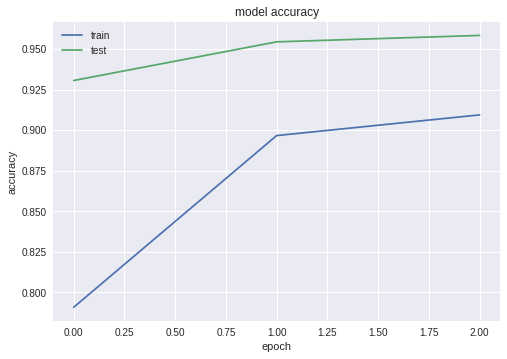

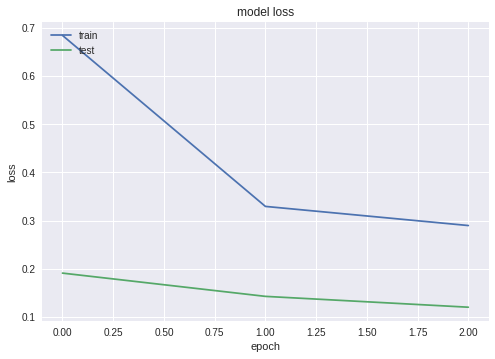

LeNet0.h5 model saved successfully
5000/5000 [==============================] - 2s 428us/step
Loss = 0.06614753434360027
Test Accuracy = 0.9842
Learning Rate Alpha =  0.0019392643388636663
Momentum Beta =  0.9916064933354238
Training  1
Train on 59496 samples, validate on 504 samples
Epoch 1/3
59496/59496 [==============================] - 65s 1ms/step - loss: 0.4115 - acc: 0.8719 - val_loss: 0.1587 - val_acc: 0.9405
Epoch 2/3
59496/59496 [==============================] - 63s 1ms/step - loss: 0.3207 - acc: 0.9001 - val_loss: 0.1411 - val_acc: 0.9524
Epoch 3/3
59496/59496 [==============================] - 63s 1ms/step - loss: 0.3125 - acc: 0.9054 - val_loss: 0.1095 - val_acc: 0.9603
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


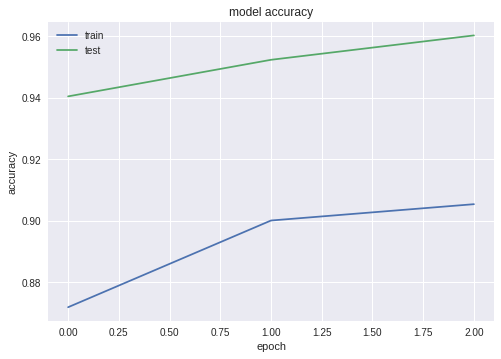

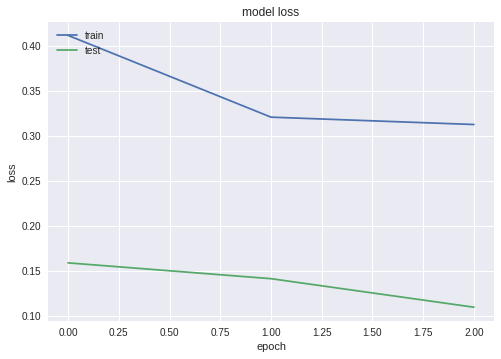

LeNet1.h5 model saved successfully
5000/5000 [==============================] - 2s 437us/step
Loss = 0.062335253623872995
Test Accuracy = 0.9848
Learning Rate Alpha =  0.006690267147102373
Momentum Beta =  0.9988666240192318
Training  2
Train on 59496 samples, validate on 504 samples
Epoch 1/3
59496/59496 [==============================] - 64s 1ms/step - loss: 0.2550 - acc: 0.9218 - val_loss: 0.1125 - val_acc: 0.9563
Epoch 2/3
59496/59496 [==============================] - 64s 1ms/step - loss: 0.2396 - acc: 0.9267 - val_loss: 0.0962 - val_acc: 0.9623
Epoch 3/3
59496/59496 [==============================] - 63s 1ms/step - loss: 0.2311 - acc: 0.9283 - val_loss: 0.1018 - val_acc: 0.9623
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


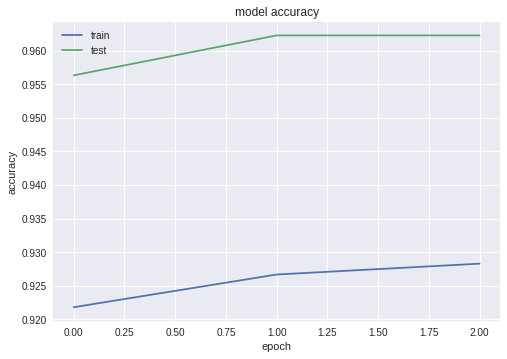

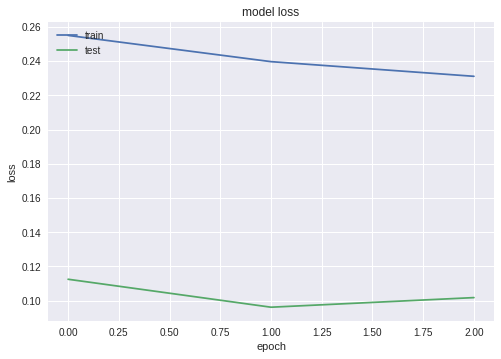

LeNet2.h5 model saved successfully
5000/5000 [==============================] - 2s 438us/step
Loss = 0.05244588077366352
Test Accuracy = 0.9866
Learning Rate Alpha =  0.0019006165866990601
Momentum Beta =  0.9972058083482926
Training  3
Train on 59496 samples, validate on 504 samples
Epoch 1/3
59496/59496 [==============================] - 66s 1ms/step - loss: 0.2211 - acc: 0.9319 - val_loss: 0.0961 - val_acc: 0.9603
Epoch 2/3
59496/59496 [==============================] - 65s 1ms/step - loss: 0.2188 - acc: 0.9336 - val_loss: 0.0933 - val_acc: 0.9643
Epoch 3/3
59496/59496 [==============================] - 64s 1ms/step - loss: 0.2126 - acc: 0.9343 - val_loss: 0.0899 - val_acc: 0.9623
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


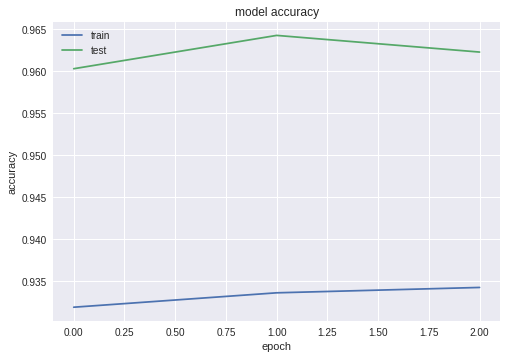

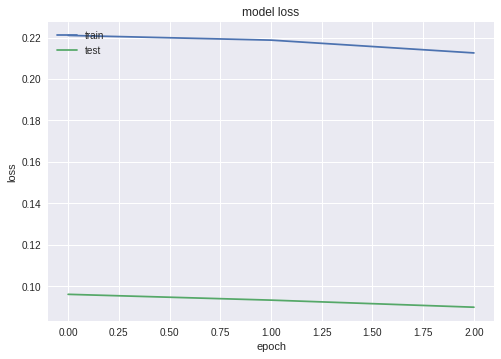

LeNet3.h5 model saved successfully
5000/5000 [==============================] - 2s 439us/step
Loss = 0.048987049985677
Test Accuracy = 0.9886
Learning Rate Alpha =  0.00040274190835999543
Momentum Beta =  0.9854755124816269
Training  4
Train on 59496 samples, validate on 504 samples
Epoch 1/3
59496/59496 [==============================] - 66s 1ms/step - loss: 0.2176 - acc: 0.9325 - val_loss: 0.0962 - val_acc: 0.9603
Epoch 2/3
59496/59496 [==============================] - 64s 1ms/step - loss: 0.2200 - acc: 0.9322 - val_loss: 0.0955 - val_acc: 0.9603
Epoch 3/3
59496/59496 [==============================] - 64s 1ms/step - loss: 0.2177 - acc: 0.9322 - val_loss: 0.0943 - val_acc: 0.9643
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


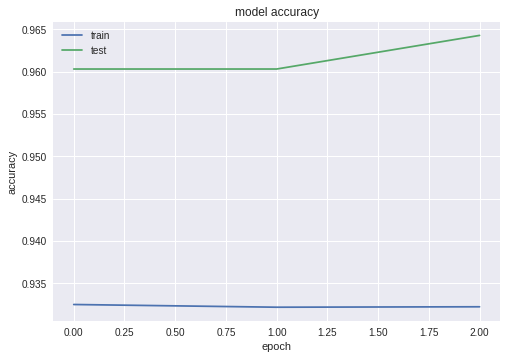

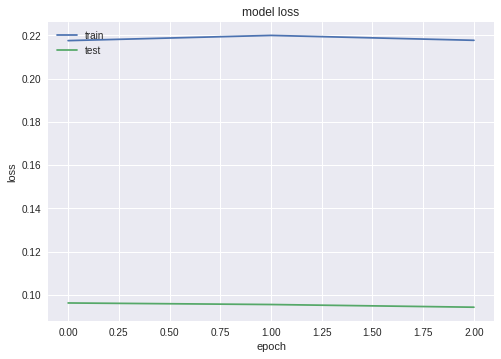

LeNet4.h5 model saved successfully
5000/5000 [==============================] - 2s 439us/step
Loss = 0.05078882847353816
Test Accuracy = 0.988
Learning Rate Alpha =  0.001
Momentum Beta =  0.9


In [46]:
# Training 
for i in range(5):
    opt = optimizers.Adam(lr=alpha[i], beta_1=beta[i], beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # Fit the model
    print('Training ',i)
    history = model.fit(train_data, train_labels, validation_split=0.0084, epochs=3, batch_size=32)
    
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracys
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # Save model
    wname = 'LeNet' + str(i) +'.h5'
    model.save_weights(wname)
    print(wname,'model saved successfully')
    
    # Evaluate model
    preds = model.evaluate(eval_data,eval_labels)
    print ("Loss = " + str(preds[0]))
    print ("Test Accuracy = " + str(preds[1]))
    print ("Learning Rate Alpha = ", alpha[i])
    print ("Momentum Beta = ", beta[i])
    

In [0]:
model.load_weights('LeNet4.h5', by_name=False)

In [48]:
history = model.fit(train_data, train_labels, validation_split=0.0084, epochs=5, batch_size=32)

Train on 59496 samples, validate on 504 samples
Epoch 1/5
59496/59496 [==============================] - 63s 1ms/step - loss: 0.2145 - acc: 0.9350 - val_loss: 0.0888 - val_acc: 0.9623
Epoch 2/5
59496/59496 [==============================] - 63s 1ms/step - loss: 0.2106 - acc: 0.9348 - val_loss: 0.0886 - val_acc: 0.9683
Epoch 3/5
59496/59496 [==============================] - 64s 1ms/step - loss: 0.2113 - acc: 0.9358 - val_loss: 0.0899 - val_acc: 0.9663
Epoch 4/5
59496/59496 [==============================] - 65s 1ms/step - loss: 0.2120 - acc: 0.9351 - val_loss: 0.0997 - val_acc: 0.9583
Epoch 5/5
59496/59496 [==============================] - 65s 1ms/step - loss: 0.2108 - acc: 0.9358 - val_loss: 0.0835 - val_acc: 0.9623


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


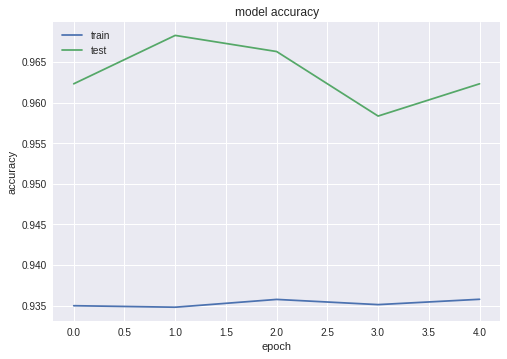

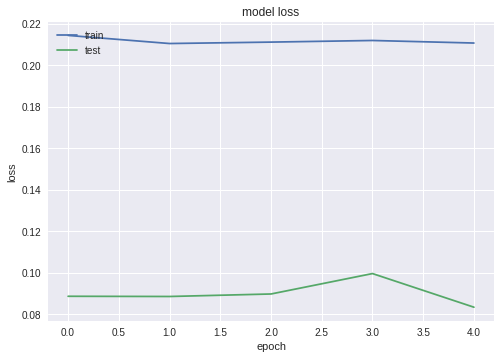

LeNet4.h5 model saved successfully
5000/5000 [==============================] - 2s 439us/step
Loss = 0.04759576088413596
Test Accuracy = 0.989


In [49]:
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracys
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # Save model
    wname = 'LeNet' + str(i) +'.h5'
    model.save_weights(wname)
    print(wname,'model saved successfully')
    
    # Evaluate model
    preds = model.evaluate(eval_data,eval_labels)
    print ("Loss = " + str(preds[0]))
    print ("Test Accuracy = " + str(preds[1]))